## Recommendation system
- Item/Content based filtering
- Collaborative filtering

#### Case - 1 --> Item/Content based filtering
let their be three user
user 1 likes Apple, orange and banana
user 2 likes Apple, orange
user 3 likes Apple
so we can recommend orange to user 3 as all the users likes apple, also
user 1 and user 2 likes orange hence user 3 is most likely to like orange

#### Case - 2 --> Collaborative filtering
user 1 likes pasta and pizza
user 2 also likes pizza and pasta and also coke
since user 1 and user 2 have similar likings, we can recommend coke to the user 1
- Collaborative filtering further divides into two parts -
    1. Model based
    2. Memory based

## Movie Recommendation System
- recommendation systems requires big quantity of data

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
# We can remove any warnings
warnings.filterwarnings('ignore')

#### Get the dataset

In [3]:
columns_name= ["user_id","item_id","rating","timestamp"]
df = pd.read_csv("ml-100k/u.data",sep='\t',names=columns_name)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
# 100K is also a small dataset
df.shape

(100000, 4)

In [5]:
# No. of unique users
df['user_id'].nunique()

943

In [6]:
# No. of unique movies
df['item_id'].nunique()

1682

In [7]:
df_item = pd.read_csv("ml-100k/u.item",sep='\|',header = None)

In [8]:
df_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df_item = df_item[[0,1]]

In [10]:
df_item.head()

,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df_item.columns = ['item_id','Title']

In [12]:
# merge function
df = pd.merge(df,df_item,on="item_id")

In [13]:
df.head()

,user_id,item_id,rating,timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Exploratory data analysis


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# group by
df.groupby('Title').mean()['rating'].sort_values(ascending=False)

Title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [16]:
df.groupby('Title').mean()['rating']


Title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
� k�ldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [17]:
df.groupby('Title').count()['rating'].sort_values(ascending=False)  # --> count() function counts the number of repetitive title

Title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [18]:
# create a dataframe of rating
ratings = pd.DataFrame(df.groupby('Title').mean()['rating'])

In [19]:
ratings.head()

,rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [20]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('Title').count()['rating'])

In [21]:
ratings.head()

,rating,no. of ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [22]:
ratings[ratings['no. of ratings']==1]

,rating,no. of ratings
Title,,
Aiqing wansui (1994),5.0,1
All Things Fair (1996),3.0,1
Angel on My Shoulder (1946),2.0,1
Angela (1995),3.0,1
August (1996),1.0,1
...,...,...
Witness (1985),4.0,1
"Woman in Question, The (1950)",1.0,1
Yankee Zulu (1994),1.0,1


In [23]:
# we cannot recommend movies that are only watched or rated by 2 or 3 person
ratings.sort_values(by='rating',ascending=False)

,rating,no. of ratings
Title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


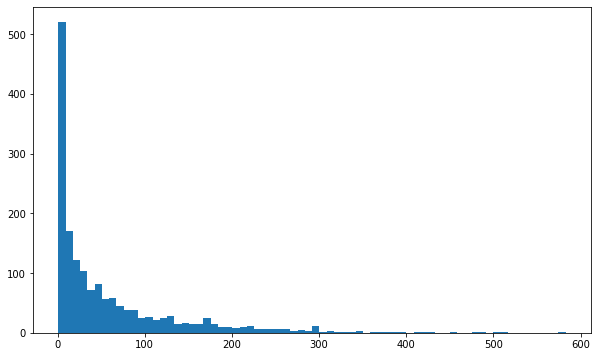

In [24]:
plt.figure(figsize=(10,6))
plt.hist(ratings['no. of ratings'],bins=70)
plt.show()

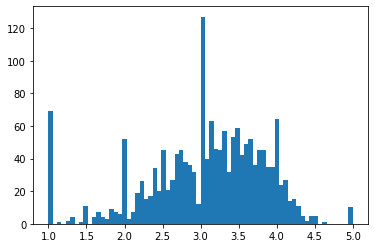

In [25]:
# plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)
plt.show()

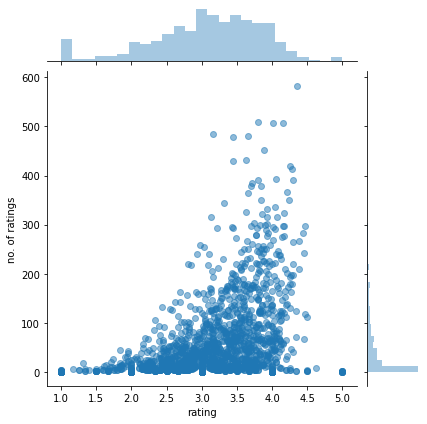

In [26]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)

## Creating Movie Recommendation

In [27]:
import numpy as np
# create a matrix with row as user_id and columns as title
# so matrix[user_id][title] = rating
# user_id = df['user_id']
# title = df['Title']
# row = 0
# matrix = np.zeros((df['user_id'].nunique(),df['Title'].nunique()))
# for x in user_id:
#     col = 0
#     for y in title:
#         matrix[row][col] = df[x][y]
#         col += 1
#     row += 1

In [28]:
moviemat = df.pivot_table(index='user_id',columns="Title",values='rating')

In [29]:
moviemat.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [30]:
ratings.sort_values('no. of ratings',ascending=False).head()

,rating,no. of ratings
Title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [31]:
starwars_user_rating = moviemat['Star Wars (1977)']

In [32]:
starwars_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [33]:
# Now we will see a correlation between  star wars movie and other movies
similar_to_starwars = moviemat.corrwith(starwars_user_rating)



In [34]:
similar_to_starwars
# Why there are some NaN value in the series ?
# Ans -> Because the user didn't rated that movie

Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [35]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [36]:
# Drop values that have NaN values
corr_starwars.dropna()
# Even after running the above, the NaN values exist in the dataframe, so use inplace=True

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [37]:
corr_starwars.head(10)

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [38]:
corr_starwars.dropna(inplace=True)

In [39]:
corr_starwars

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [40]:
# so if the user likes the star wars movie, with the help of correlation with starwars,we can recommend a movie
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
Title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [41]:
# we will set a threshold, that the number of ratings of movies must be above a fixed number then only can be considered for participant
corr_starwars = corr_starwars.join(ratings['no. of ratings'])

In [42]:
corr_starwars
xc = corr_starwars[corr_starwars['no. of ratings']>100]

In [43]:
xc.sort_values('Correlation',ascending=False)

,Correlation,no. of ratings
Title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


### Predict Function

In [44]:
def predictmovie(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(ratings['no. of ratings'])
    return corr_movie[corr_movie['no. of ratings']>100].sort_values('Correlation',ascending=False)

In [45]:
predictions = predictmovie('Titanic (1997)')
predictions.head()

,Correlation,no. of ratings
Title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
